# Build a linear regression model with numpy

in this tutorial we are about to build a linear regression model using only Numpy library without the need to SKlearn

[credits](https://www.cs.toronto.edu/~frossard/post/linear_regression/) 

First lets define our Y

$$ Y = \sin(x) + 0.1 \times X^2 $$

and of course we would add some random noise to the data

Text(0, 0.5, 'Y')

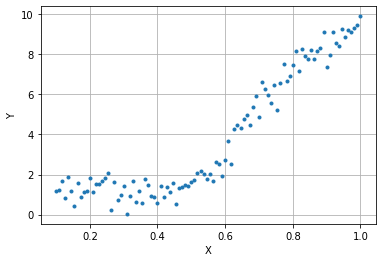

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)
plt.plot(data_x, data_y, '.')
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")

We need to add the bias parameter to the features

In [2]:
data_x[:5]

array([[0.1       ],
       [0.10909091],
       [0.11818182],
       [0.12727273],
       [0.13636364]])

In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x))

In [4]:
data_x[:5]

array([[1.        , 0.1       ],
       [1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.12727273],
       [1.        , 0.13636364]])

Let's split our data into train and test

We will user permutation to get a random indices to choose 

In [5]:
np.random.permutation(10)

array([1, 5, 3, 9, 4, 6, 8, 7, 0, 2])

In [6]:
data_x[[1,2,5]]

array([[1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.14545455]])

In [7]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

Calculate the gradient

Our cost/error function can be calculated as follows

$$ Error(W) = \frac{1}{2m} \sum_{i=1}^{m}[\hat{y} - y]^2 $$

where $m$ is the size of the data.

Gradient descent update the weights based on the equation

$$ W_{i+1} = W_{i} - \eta \frac{\mathrm{d} }{\mathrm{d} W} Error(W) $$


Gradient equation

$$ \frac{\mathrm{d} }{\mathrm{d} W} = \frac{1}{m}(\hat{y}-y)x_i $$

In [16]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y_estimate - y.flatten())
    gradient = (1.0/len(x)) * error.dot(x)
    return gradient, (np.power(error, 2))/(2*x.shape[0])

Gradient decent

In [17]:
w = np.random.randn(2)
alpha = 0.5 #learning rate
tolerance = 1e-5
weights = []

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    weights.append(new_w)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 100 iterations
    if iterations % 100 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error.sum()))
    
    iterations += 1
    w = new_w

Iteration: 100 - Error: 0.8455
Iteration: 200 - Error: 0.8332
Iteration: 300 - Error: 0.8331
Converged.


In [18]:
def predict(x, w):
    return x.dot(w).flatten()

In [19]:
y_pred = predict(test_x, w)

In [20]:
y_pred

array([2.75816066, 7.72306237, 2.1145623 , 7.90694761, 7.53917712,
       4.68895577, 4.59701315, 8.18277549, 0.91930818, 5.97615251,
       6.06809513, 1.7467918 , 6.98752137, 7.17140662, 1.56290655,
       4.78089839, 2.85010329, 0.73542293, 5.14866889, 8.36666073])

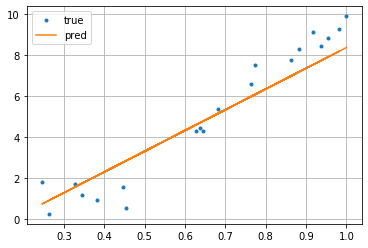

In [21]:
plt.plot(test_x[:, 1], test_y, '.', label='true')
plt.plot(test_x[:, 1], y_pred, label='pred')
plt.legend()
plt.grid()

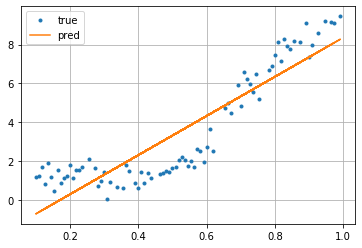

In [22]:
train_y_pred = predict(train_x, w)
plt.plot(train_x[:, 1], train_y, '.', label='true')
plt.plot(train_x[:, 1], train_y_pred, label='pred')
plt.legend()
plt.grid()

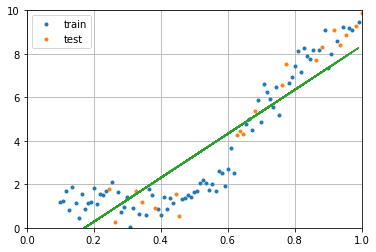

In [23]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
fig.figsize = (15, 15)
ax.set_xlim(( 0, 1))
ax.set_ylim((0, 10))
ax.plot(train_x[:, 1], train_y, '.', label='train')
ax.plot(test_x[:, 1], test_y, '.', label='test')
ax.legend()
ax.grid()

line, = ax.plot([], [])

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = train_x
    y = predict(x, weights[i])
    line.set_data(x[:, 1], y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=20, blit=True)
HTML(anim.to_html5_video())